In [1]:
import numpy as np
import matplotlib.pyplot as plt
# data files
from run_0_stop_data import *
from run_1_stop_data import *
from run_2_stop_data import *
from run_3_stop_data import *
from run_4_stop_data import *
from run_5_stop_data import *

In [2]:
# stop sign test
stop_sign = (30.0,1.0) # x,y
initial = np.array([6.0, 1.0, 4.0, 0.0])
DESIRED_SPEED = 4.0 # m/s

def dist_to_stop_line(xy):
    x0, y0 = stop_sign
    x,y = xy
    dist = np.sqrt((y-y0)**2 + (x-x0)**2)*np.cos(np.arctan2(y0-y, x0-x))
    return dist

stop_dist = 0.0 # meters, distance to stop sign when we should stop

def desired_speed(k:int, xy:np.array):
    xy = np.reshape(xy, (2,))
    dist = dist_to_stop_line(xy)
    if dist > 10:
        return DESIRED_SPEED
    else:
        return np.max([0, DESIRED_SPEED*(dist-stop_dist)/10.0])


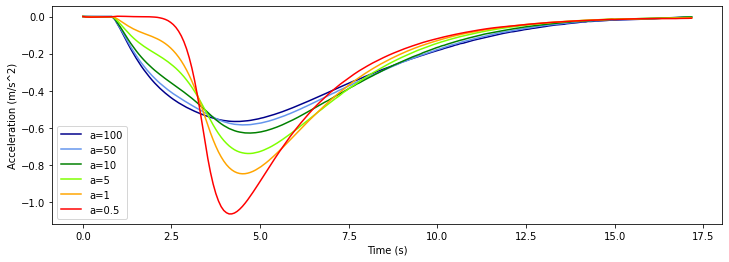

In [3]:
fig1, ax1 = plt.subplots(1,1, figsize=(12,4))
T=0.075
time = T*np.arange(0, np.size(run_0_stop_u[:,0]))
ax1.plot(time, run_0_stop_u[:,0], label="a=100", color="darkblue")
ax1.plot(time, run_1_stop_u[:,0], label="a=50", color="cornflowerblue")
ax1.plot(time, run_2_stop_u[:,0], label="a=10", color="green")
ax1.plot(time, run_3_stop_u[:,0], label="a=5", color="chartreuse")
ax1.plot(time, run_4_stop_u[:,0], label="a=1", color="orange")
ax1.plot(time, run_5_stop_u[:,0], label="a=0.5", color="red")
plt.legend()
plt.xlabel("Time (s)"); plt.ylabel("Acceleration (m/s^2)")
plt.savefig("Acceleration(stop).pdf")

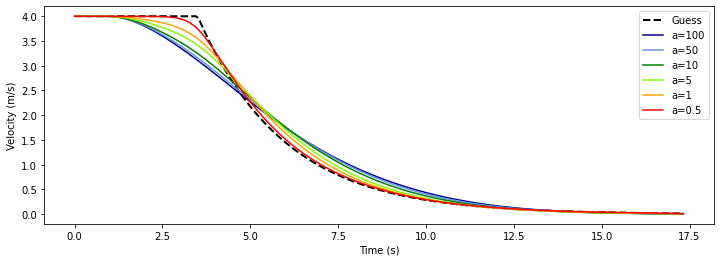

In [4]:
fig2, ax2 = plt.subplots(1,1, figsize=(12,4))
v_des = np.zeros(np.size(run_0_stop[:,2]))
pos = np.copy(initial[0:2])
for i in range(v_des.size):
    v_des[i] = desired_speed(i, pos)
    pos[0] += v_des[i]*T

T=0.075
ax2.plot(T*np.arange(0, np.size(v_des)), v_des, label="Guess", color="black", linestyle="--", linewidth=2)
ax2.plot(T*np.arange(0, np.size(run_0_stop[:,2])), run_0_stop[:,2], label="a=100", color="darkblue")
ax2.plot(T*np.arange(0, np.size(run_1_stop[:,2])), run_1_stop[:,2], label="a=50", color="cornflowerblue")
ax2.plot(T*np.arange(0, np.size(run_2_stop[:,2])), run_2_stop[:,2], label="a=10", color="green")
ax2.plot(T*np.arange(0, np.size(run_3_stop[:,2])), run_3_stop[:,2], label="a=5", color="chartreuse")
ax2.plot(T*np.arange(0, np.size(run_4_stop[:,2])), run_4_stop[:,2], label="a=1", color="orange")
ax2.plot(T*np.arange(0, np.size(run_5_stop[:,2])), run_5_stop[:,2], label="a=0.5", color="red")
plt.legend()
plt.xlabel("Time (s)"); plt.ylabel("Velocity (m/s)")
plt.savefig("Velocity(stop).pdf")

In [5]:
# data files
from run_6_data import *
from run_1_data import *
from run_2_data import *
from run_3_data import *
from run_4_data import *
from run_5_data import *

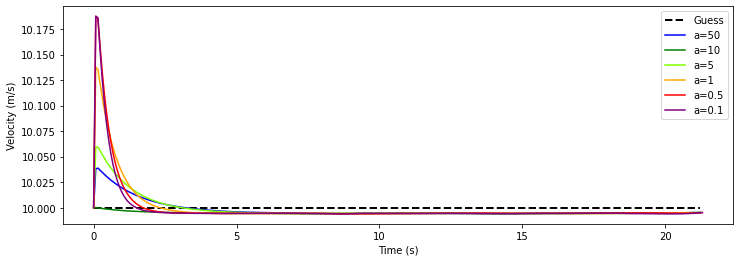

In [6]:
fig3, ax3 = plt.subplots(1,1, figsize=(12,4))

v_des = np.ones(np.size(run_1[:,2]))*10.0

T=0.075
ax3.plot(T*np.arange(0, np.size(v_des)), v_des, label="Guess", color="black", linestyle="--", linewidth=2)
ax3.plot(T*np.arange(0, np.size(run_1[:,2])), run_1[:,2], label="a=50", color="blue")
ax3.plot(T*np.arange(0, np.size(run_2[:,2])), run_2[:,2], label="a=10", color="green")
ax3.plot(T*np.arange(0, np.size(run_3[:,2])), run_3[:,2], label="a=5", color="chartreuse")
ax3.plot(T*np.arange(0, np.size(run_4[:,2])), run_4[:,2], label="a=1", color="orange")
ax3.plot(T*np.arange(0, np.size(run_5[:,2])), run_5[:,2], label="a=0.5", color="red")
ax3.plot(T*np.arange(0, np.size(run_6[:,2])), run_6[:,2], label="a=0.1", color="purple")
plt.legend()
plt.xlabel("Time (s)"); plt.ylabel("Velocity (m/s)")
plt.savefig("Velocity(stop).pdf")

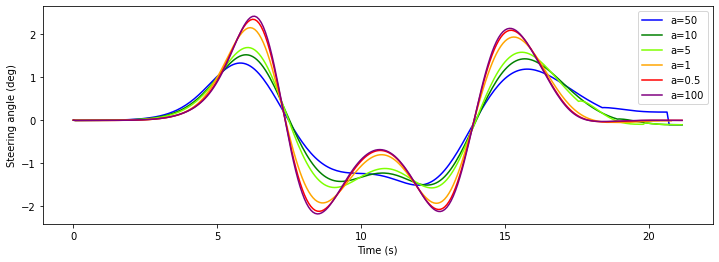

In [7]:
fig4, ax4 = plt.subplots(1,1, figsize=(12,4))
T=0.075
time = T*np.arange(0, np.size(run_1_u[:,1]))
ax4.plot(T*np.arange(0, np.size(run_1_u[:,1])), 180.0/np.pi*run_1_u[:,1], label="a=50", color="blue")
ax4.plot(T*np.arange(0, np.size(run_2_u[:,1])), 180.0/np.pi*run_2_u[:,1], label="a=10", color="green")
ax4.plot(T*np.arange(0, np.size(run_3_u[:,1])), 180.0/np.pi*run_3_u[:,1], label="a=5", color="chartreuse")
ax4.plot(T*np.arange(0, np.size(run_4_u[:,1])), 180.0/np.pi*run_4_u[:,1], label="a=1", color="orange")
ax4.plot(T*np.arange(0, np.size(run_5_u[:,1])), 180.0/np.pi*run_5_u[:,1], label="a=0.5", color="red")
ax4.plot(T*np.arange(0, np.size(run_6_u[:,1])), 180.0/np.pi*run_6_u[:,1], label="a=100", color="purple")
plt.legend()
plt.xlabel("Time (s)"); plt.ylabel("Steering angle (deg)")
plt.savefig("Steering(lanechange).pdf")

### Position error

In [8]:
# TODO Position error
from roadrunner_2 import Roadrunner
from road import iso_double_lane_change as test_road
test_road_width = 5.0*np.ones(np.size(test_road)//2)

roadrunner = Roadrunner(road_center = test_road, # Road centerline points
                        road_width  = test_road_width,
                        P           = np.size(test_road_width)-1,
                       start_pct = 0.0, end_pct = 1.0) # Number of points to try curve-fitting at a time
roadrunner.reset()
# start a bit ahead of the first point to have space for looking back on the road
roadrunner.advance(T*20*DESIRED_SPEED)

 [  0.]] is 10.0 away at s = 1.0, B(s) = [[290.]
 [  0.]]


In [18]:
def error(run_n:np.array):
    err = np.zeros(np.size(run_n[:,0]))
    for i in range(err.size):
        xy = run_n[i,0:2]
        s = roadrunner.find_closest(xy)
        xy_c = roadrunner.evaluate(s, is_pct=True)
        err[i] = np.linalg.norm(xy_c-xy, 2)
    return err


err_1 = error(run_1)
err_2 = error(run_2)
err_3 = error(run_3)
err_4 = error(run_4)
err_5 = error(run_5)
err_6 = error(run_6)

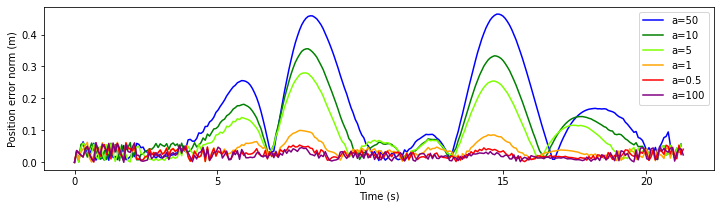

In [29]:
fig5, ax5 = plt.subplots(1,1, figsize=(12,3))
ax5.plot(T*np.arange(0, np.size(err_1)), err_1, label="a=50", color="blue")
ax5.plot(T*np.arange(0, np.size(err_2)), err_2, label="a=10", color="green")
ax5.plot(T*np.arange(0, np.size(err_3)), err_3, label="a=5", color="chartreuse")
ax5.plot(T*np.arange(0, np.size(err_4)), err_4, label="a=1", color="orange")
ax5.plot(T*np.arange(0, np.size(err_5)), err_5, label="a=0.5", color="red")
ax5.plot(T*np.arange(0, np.size(err_6)), err_6, label="a=100", color="purple")
plt.legend()
plt.xlabel("Time (s)"); plt.ylabel("Position error norm (m)")
plt.savefig("Position error(lanechange).pdf")

In [124]:
# Get the road boundaries
npoints = 100
boundaries = np.zeros((npoints,4))
roadrunner.reset()
step = roadrunner.segments[roadrunner._segment_ptr].curve.length/(npoints+1)
for i in range(npoints):
    xy, angle, width = roadrunner.evaluate(full_data=True)
    xy_up = xy.T; xy_down = np.copy(xy_up)
    xy_up += width*np.array([np.cos(np.pi/2.0-angle), np.sin(np.pi/2.0-angle)])
    
    xy_down += width*np.array([np.cos(-np.pi/2.0-angle), np.sin(-np.pi/2.0-angle)])
    boundaries[i,0:2] = xy_up.T
    boundaries[i, 2:] = xy_down.T
    roadrunner.advance(step)
    
road = np.zeros((npoints*2+2, 2))
road[0,0] = boundaries[0,0]; road[0,1] = boundaries[0,3]
road[1:npoints+1, :] = boundaries[:,0:2]
road[npoints+1:2*npoints+1, :] = np.flip(boundaries[:,2:], axis=0)
road[-1,:] = road[0,:]

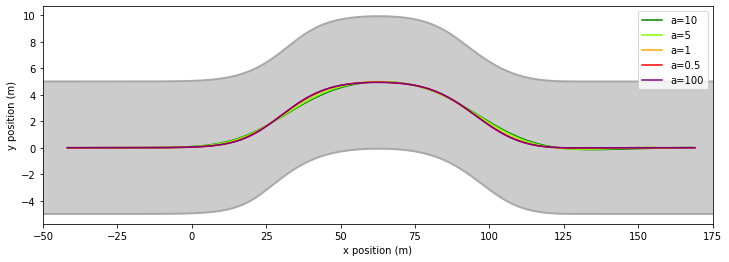

In [125]:
fig6, ax6 = plt.subplots(1,1, figsize=(12, 4))
ax6.plot(road[:,0], road[:,1], color="darkgrey", linewidth=2)
ax6.fill(road[:,0], road[:,1], color="#cccccc")
ax6.plot(run_2[:,0], run_2[:,1], label="a=10", color="green")
ax6.plot(run_3[:,0], run_3[:,1], label="a=5", color="chartreuse")
ax6.plot(run_4[:,0], run_4[:,1], label="a=1", color="orange")
ax6.plot(run_5[:,0], run_5[:,1], label="a=0.5", color="red")
ax6.plot(run_6[:,0], run_6[:,1], label="a=100", color="purple")
plt.legend()
plt.xlabel("x position (m)"); plt.ylabel("y position (m)")
plt.xlim([-50, 175])
plt.savefig("Trajectories(lanechange).pdf")